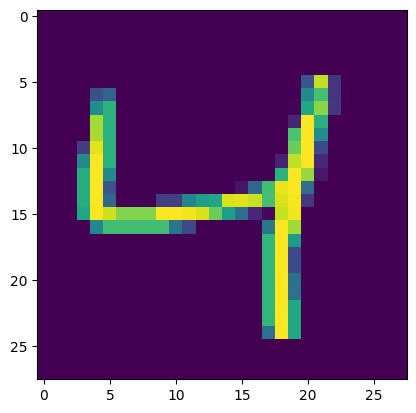

magic_number = 2051
num_of_images = 60000
rows = 28
cols = 28
X.dtype = float32
X.shape = (60000, 784)
X[2] = [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  67. 232.  39.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  62.  81.   0.   

In [21]:
import struct
import numpy as np
import gzip
try:
    from simple_ml_ext import *
except:
    pass

#import matplotlib
#matplotlib.use('Agg')  # Non-interactive backend
#import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

def add(x, y):
    """ A trivial 'add' function you should implement to get used to the
    autograder and submission system.  The solution to this problem is in the
    the homework notebook.

    Args:
        x (Python number or numpy array)
        y (Python number or numpy array)

    Return:
        Sum of x + y
    """
    ### BEGIN YOUR CODE
    return x+y
    ### END YOUR CODE


def parse_mnist(image_filename, label_filename):
    """ Read an images and labels file in MNIST format.  See this page:
    http://yann.lecun.com/exdb/mnist/ for a description of the file format.

    Args:
        image_filename (str): name of gzipped images file in MNIST format
        label_filename (str): name of gzipped labels file in MNIST format

    Returns:
        Tuple (X,y):
            X (numpy.ndarray[np.float32]): 2D numpy array containing the loaded 
                data.  The dimensionality of the data should be 
                (num_examples x input_dim) where 'input_dim' is the full 
                dimension of the data, e.g., since MNIST images are 28x28, it 
                will be 784.  Values should be of type np.float32, and the data 
                should be normalized to have a minimum value of 0.0 and a 
                maximum value of 1.0 (i.e., scale original values of 0 to 0.0 
                and 255 to 1.0).

            y (numpy.ndarray[dtype=np.uint8]): 1D numpy array containing the
                labels of the examples.  Values should be of type np.uint8 and
                for MNIST will contain the values 0-9.
    """
    ### BEGIN YOUR CODE
    with gzip.open(image_filename,'rb') as f:
        # Read header
        magic_number = struct.unpack('>I', f.read(4))[0]
        if magic_number != 2051:
            raise ValueError(f"Error: magic number of input image file: {image_filename} is wrong.")
        num_of_images = struct.unpack('>I', f.read(4))[0]
        rows = struct.unpack('>I', f.read(4))[0]
        cols = struct.unpack('>I', f.read(4))[0]

        # Read data
        # Pre-allocate the data array
        X = np.zeros((num_of_images, rows*cols), dtype=np.float32)
        y = np.empty((num_of_images), dtype=np.uint8)

        # Read data for each image
        for i in range(num_of_images):
            #image_data = struct.unpack(f'>{rows * cols}B', f.read(rows * cols))
            # Read the exact number of bytes expected for one image
            image_bytes = f.read(rows * cols)
            if image_bytes is None:
                raise ValueError(f"Error: Read returned None for image {i}")
        
            # Debugging: Check if we got the correct number of bytes
            if len(image_bytes) != rows * cols:
                raise ValueError(f"Error reading image {i}: expected {rows * cols} bytes, got {len(image_bytes)} bytes.")            

            image_data = struct.unpack(f'>{rows * cols}B', image_bytes)
            X[i] = np.array(image_data, dtype=np.float32)

        image = np.asarray(X[2].reshape(rows, cols), dtype=np.uint8)
        plt.imshow(image)
        plt.show()

        #magic_number = np.frombuffer(f.read(4), dtype=np.dtype(np.uint32).newbyteorder('>')).astype(int)[0]
        #num_of_images = np.frombuffer(f.read(4), dtype=np.dtype(np.uint32).newbyteorder('>')).astype(int)[0]
        print(f"magic_number = {magic_number}")
        print(f"num_of_images = {num_of_images}")
        print(f"rows = {rows}")
        print(f"cols = {cols}")
        print(f"X.dtype = {X.dtype}")
        print(f"X.shape = {X.shape}")
        print(f"X[2] = {X[2]}")

        return X, y
    ### END YOUR CODE

#########################
#     Main-Routine      #
#########################
def main():
    X,y = parse_mnist("../data/train-images-idx3-ubyte.gz",
                      "../data/train-labels-idx1-ubyte.gz")

#---------------Execution---------------#
if __name__ == '__main__':
    main()